# Predicting - Temperature
## Input data

In [35]:
startDate = "2013-01-01"
endDate = "2013-01-01"
num_timestamps = 24
history = [34.38, 34.36, 34.74, 35.26, 35.23, 35.29, 35.64, 36.02,\
           36.1, 36.98, 37.01, 36.75, 36.01, 35.66, 34.72,\
           33.9, 32.62, 31.51, 30.73, 29.5, 26.94, 25.47, 23.84, 22.55]
num_days_to_predict = 1
sample_output = [36.02, 36.1, 36.98, 37.01, 36.75, 36.01, 35.66,\
                 34.72, 33.9, 32.62, 31.51, 30.73, 29.5, 26.94, 25.47,\
                 23.84, 22.55, 21.03, 19.92, 18.77, 18.48, 18.07, 17.91, 17.11]

In [36]:
print(type(history), type(sample_output)), len(history), len(sample_output)

<class 'list'> <class 'list'>


(None, 24, 24)

## Import required packages

In [101]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')

### Generate a time series of hourly time stamps over a 24 hr period

In [124]:
timeseries = pd.date_range('2013-01-01', periods=24, freq='H')


In [321]:
timeseries

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               '2013-01-01 10:00:00', '2013-01-01 11:00:00',
               '2013-01-01 12:00:00', '2013-01-01 13:00:00',
               '2013-01-01 14:00:00', '2013-01-01 15:00:00',
               '2013-01-01 16:00:00', '2013-01-01 17:00:00',
               '2013-01-01 18:00:00', '2013-01-01 19:00:00',
               '2013-01-01 20:00:00', '2013-01-01 21:00:00',
               '2013-01-01 22:00:00', '2013-01-01 23:00:00'],
              dtype='datetime64[ns]', freq='H')

### Time indexed temprature pandas series for fitting an ARIMA model

In [169]:
temp_ser = pd.Series(history, index = timeseries).astype(np.float)

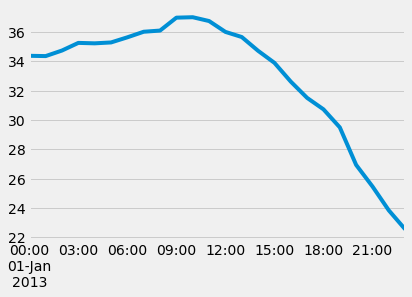

In [170]:
temp_ser.plot()
plt.show()
### NOTE ### Assumption here is that the given temp data is from 12 am to 11pm on a given day.\
### Normal temp trend might not follow the below seen trend. I am not making any time-temp adjustments here ###

### Let's fit a simple AR model with difference = 1 

AIC score: 25.502276835878867
predicted=30.480020, expected=30.730000
AIC score: 25.79754053517774
predicted=29.967245, expected=29.500000
AIC score: 27.003717590254517
predicted=28.550932, expected=26.940000
AIC score: 38.92952389765793
predicted=24.788322, expected=25.470000
AIC score: 40.5237503737761
predicted=23.832191, expected=23.840000
AIC score: 40.99534355855895
predicted=22.412296, expected=22.550000
Test MSE: 0.560


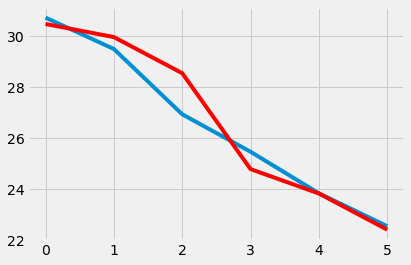

In [331]:
# Will not do an grid search for ordering parameters, simply try 2 values each for p and d...
X = temp_ser.values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    print('AIC score: {}'. format(model_fit.aic))
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## Let's predict for the the next 24 steps

In [332]:
pred = model_fit.forecast(steps=24)
pred[0]

array([ 22.41229551,  21.05577668,  19.79594705,  18.6110476 ,
        17.49571921,  16.44087389,  15.43983776,  14.48628237,
        13.57474531,  12.70035437,  11.85881425,  11.04632258,
        10.25951827,   9.49542878,   8.75142566,   8.02518455,
         7.31465012,   6.61800482,   5.93364146,   5.26013881,
         4.59624011,   3.94083401,   3.29293779,   2.65168242])

In [335]:
delta = [i-j for i, j in zip(pred[0], sample_output)]
delta

[-13.60770448520125,
 -15.044223319334513,
 -17.184052946422664,
 -18.398952398773613,
 -19.254280790726941,
 -19.569126111376722,
 -20.220162243209018,
 -20.233717630084776,
 -20.325254687049732,
 -19.919645629571555,
 -19.651185752102634,
 -19.683677423509479,
 -19.24048172701923,
 -17.444571215990567,
 -16.718574343333586,
 -15.814815445704083,
 -15.235349882814088,
 -14.41199517884783,
 -13.986358538895837,
 -13.50986118798286,
 -13.883759891563768,
 -14.129165986396959,
 -14.61706220902205,
 -14.458317576966449]

## The delta is not within 5 deg. Centrigrade...
> We can try grid search to tune the AR model above to improve the score or test other ML models

# Forecasting with Machine Learning
#### Support vector machines can be used for linear or non-linear regression modeling or classification, minimizing both the error on the training data while minimizing the complexity of the model. We can play with gamma to fit a non-linear trend optimaly...

### Given data

In [255]:
y = [34.38, 34.36, 34.74, 35.26, 35.23, 35.29, 35.64, 36.02,\
           36.1, 36.98, 37.01, 36.75, 36.01, 35.66, 34.72,\
           33.9, 32.62, 31.51, 30.73, 29.5, 26.94, 25.47, 23.84, 22.55]
y = np.array(y)
x = pd.date_range('2013-01-01', periods=24, freq='H')
type(x), type(y)


(pandas.core.indexes.datetimes.DatetimeIndex, numpy.ndarray)

In [256]:
from sklearn import preprocessing as pre
from sklearn import svm

### Using preprocessing module we will normalization the x feature data which is a datetime object

In [257]:
scaler = pre.StandardScaler().fit(x)
x_scaled = scaler.transform(x)
x_scaled

/Users/admin/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype datetime64[ns] was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/admin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/admin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


array([-1.66132477, -1.51686175, -1.37239873, -1.2279357 , -1.08347268,
       -0.93900965, -0.79454663, -0.65008361, -0.50562058, -0.36115756,
       -0.21669454, -0.07223151,  0.07223151,  0.21669454,  0.36115756,
        0.50562058,  0.65008361,  0.79454663,  0.93900965,  1.08347268,
        1.2279357 ,  1.37239873,  1.51686175,  1.66132477])

## Reshaping the array's as 1-D array for the model fit

In [258]:
x_scaled=x_scaled.reshape(-1,1)

In [259]:
y=y.reshape(-1,1)

In [260]:
len(x_scaled), len(y)

(24, 24)

In [338]:
SVR_model = svm.SVR(kernel='rbf',C=10,gamma=1).fit(x_scaled,y.ravel())


### Next we predict temp's for the following 24 hour period

In [339]:
pred_test_x = np.array(pd.date_range('2013-01-02', periods=24, freq='H')).reshape(-1,1)

In [340]:
scaler = pre.StandardScaler().fit(pred_test_x)
x_test_scaled = scaler.transform(pred_test_x)


/Users/admin/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype datetime64[ns] was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [341]:
predict_y_array = SVR_model.predict(x_test_scaled)

predict_y_array

array([ 34.27991769,  34.51838996,  34.71256416,  34.89741729,
        35.114256  ,  35.39382966,  35.73986076,  36.12017151,
        36.47048187,  36.71092149,  36.76942563,  36.60240505,
        36.20364286,  35.59748494,  34.81985652,  33.89681391,
        32.83198481,  31.61027386,  30.21734661,  28.66641278,
        27.01960347,  25.39285447,  23.9399177 ,  22.81978988])

In [342]:
SVR_model.score(x_test_scaled,predict_y_array)



1.0

## Performance with SVM

In [349]:
svm_delta = [i-j for i, j in zip(predict_y_array, sample_output)]
svm_delta

[-1.7400823083941859,
 -1.5816100413522278,
 -2.267435840732908,
 -2.1125827111957705,
 -1.6357439978063439,
 -0.61617033884102312,
 0.079860759407694104,
 1.4001715113665867,
 2.5704818691082565,
 4.0909214882766847,
 5.2594256345883004,
 5.8724050542917858,
 6.7036428625186204,
 8.6574849387064852,
 9.3498565241032665,
 10.056813909880628,
 10.2819848094022,
 10.580273857444613,
 10.297346610569488,
 9.8964127831658253,
 8.5396034683962192,
 7.3228544670196634,
 6.0299176999196753,
 5.7097898839569936]

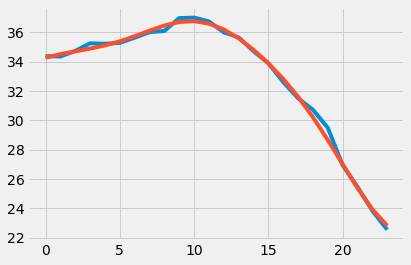

In [343]:
plt.plot(y)
plt.plot(predict_y_array)
plt.show()

# Conclusion: The SVM model performace is significantly improved over the ARIMA model
> The Accuracy improved from zero to 45%
>> The avobe SVM model was fit using the entire training data which in this case was preious days hourly temperature readings. So the model was highly overfit.
>>> Using cross-validation and grid search we can genralize the model and this, along with other models will be explored further to expand the scope of this prediction analysis